In [1]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dir_img = './tgs_salt_identification_challenge/train/images'
dir_mask = './tgs_salt_identification_challenge/train/masks'
ids = [os.path.splitext(f)[0] for f in os.listdir(dir_img)]

### visualize the images and corresponding masks

In [3]:
def load_image_mask(i):
    def transform(img, resize=True, W=None, H=None):
        # resize
        if resize:
            img = cv2.resize(img, (W, H))
        # scale down
        img = img / 255
        return img

    idx = ids[i]
    img_file = os.path.join(dir_img, idx+'.png')
    mask_file = os.path.join(dir_mask, idx+'.png')
    img = cv2.imread(img_file, 0)  # input image is in grayscale
    mask = cv2.imread(mask_file, 0)

    img = transform(img, True, 128, 128)
    mask = transform(mask, True, 128, 128)

    return img, mask

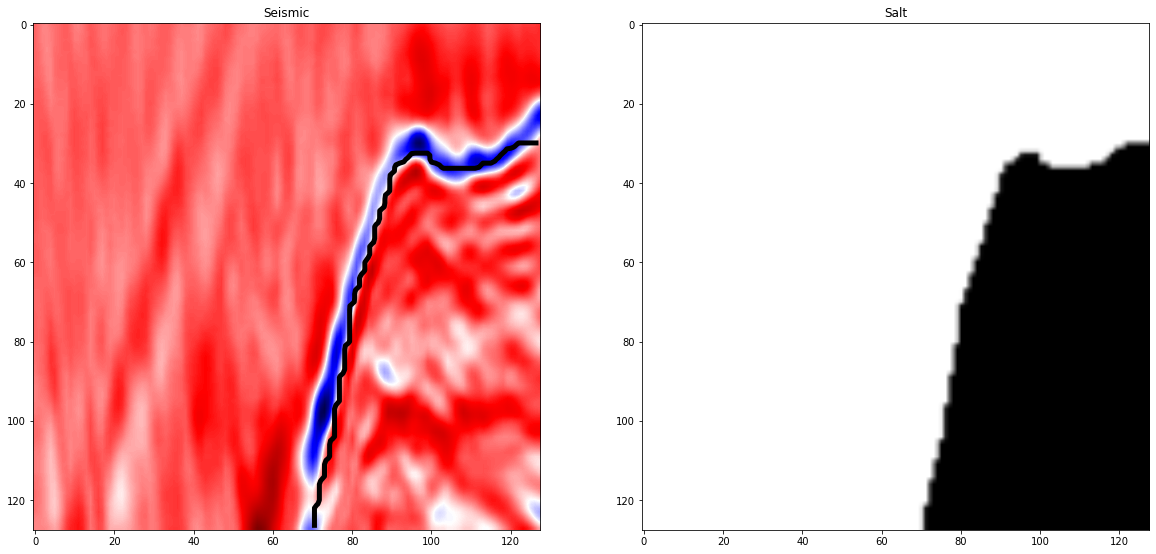

In [6]:
# Visualize any randome image along with the mask
i = random.randint(0, len(ids))
img, mask = load_image_mask(i)

has_mask = mask.max() > 0 # salt indicator

if has_mask: # if salt
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))

    ax1.imshow(img, cmap='seismic', interpolation='bilinear')
    # draw a boundary(contour) in the original image separating salt and non-salt areas
    ax1.contour(mask, colors='k', linewidths=5, levels=[0.5])
    ax1.set_title('Seismic')

    ax2.imshow(mask, cmap='gray', interpolation='bilinear')
    ax2.set_title('Salt')